In [1]:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import roc_auc_score
    from sklearn.preprocessing import StandardScaler
    from sklearn import svm
    from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(R"C:\Users\Mido Computer\Desktop\heart disease project\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape


(303, 14)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.target.value_counts()


1    165
0    138
Name: target, dtype: int64

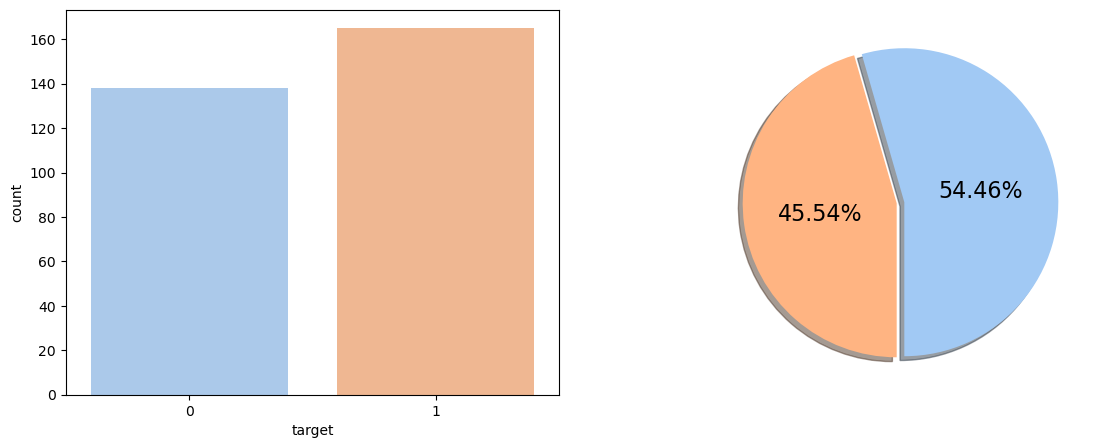

In [8]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
colors = sns.color_palette('pastel')[0:5]
sns.countplot(x='target', data=df, ax=ax[0], palette="pastel")
plt.pie(df['target'].value_counts(),autopct="%0.2f%%", explode = (0,0.05),colors=colors, shadow=True, \
             pctdistance=0.5, startangle=-90, textprops={'fontsize': 16})
plt.show()

In [9]:
df.sex.value_counts()


1    207
0     96
Name: sex, dtype: int64

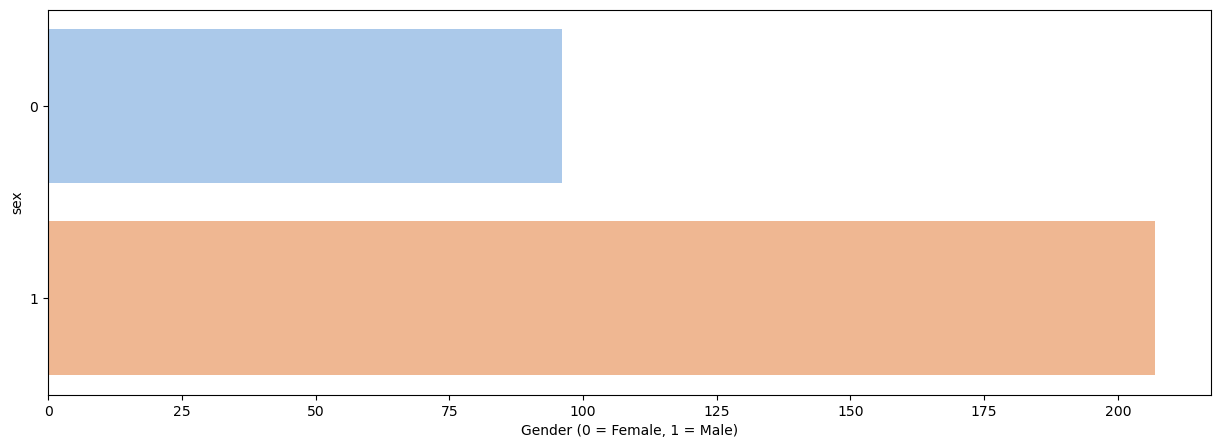

In [10]:
plt.figure(figsize = [15, 5])
sns.countplot(y='sex', data=df, palette="pastel")
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.show()

In [11]:
print("Female percentage: {:.2f}%".format((len(df[df.sex == 0]) / (len(df.sex))*100)))
print("Male percentage: {:.2f}%".format((len(df[df.sex == 1]) / (len(df.sex))*100)))

Female percentage: 31.68%
Male percentage: 68.32%


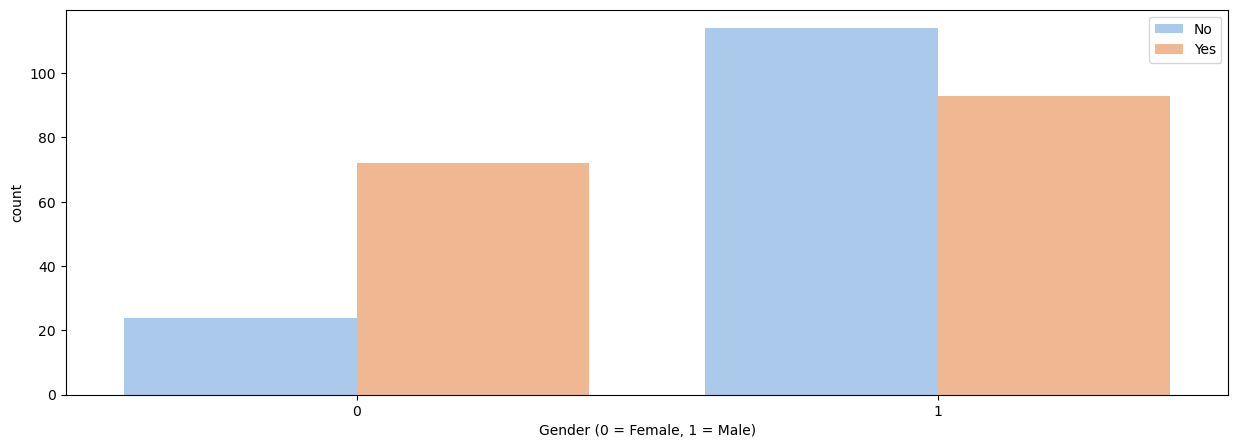

In [12]:
plt.figure(figsize = [15, 5])
sns.countplot(x="sex", hue="target", data=df, palette="pastel")
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.legend(["No", "Yes"])
plt.show()

In [13]:
mdf = pd.crosstab(df.age,df.target)


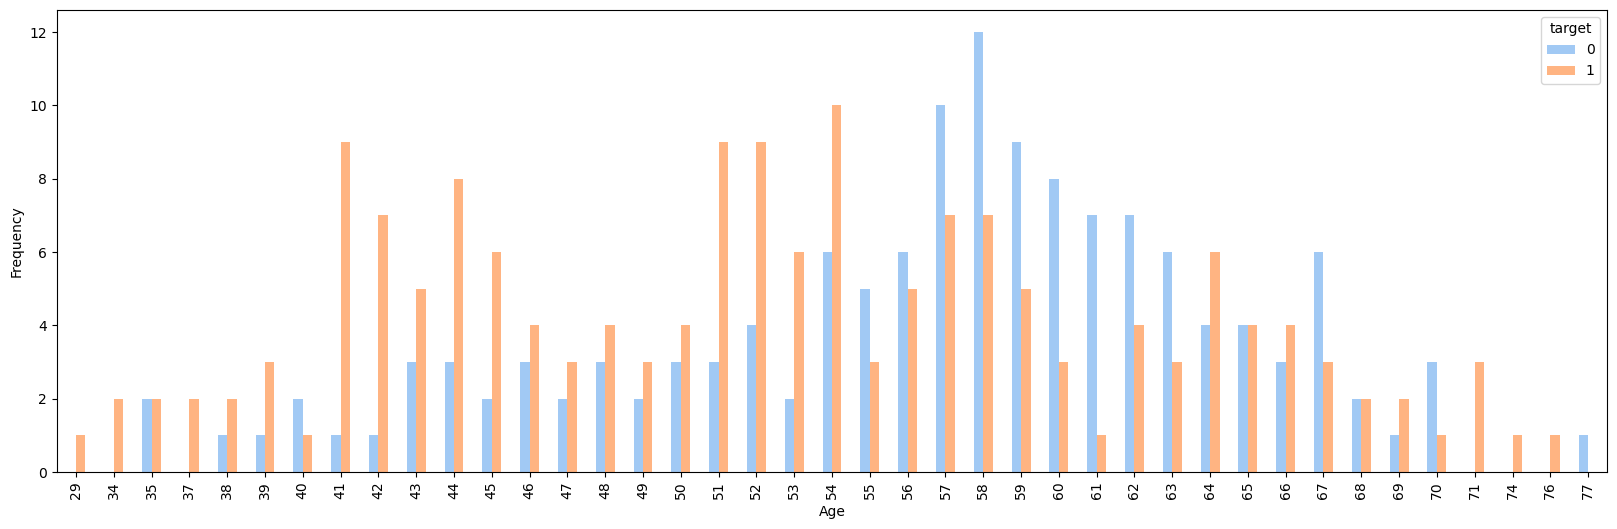

In [14]:
colors = sns.color_palette('pastel')[0:5]
mdf.plot(kind="bar",figsize=(20,6), color=colors)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

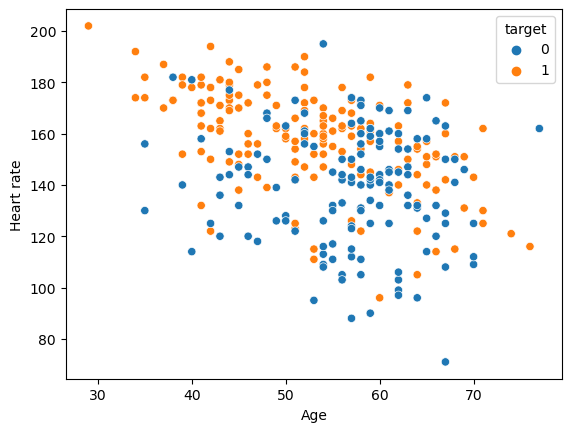

In [15]:
sns.scatterplot(data=df, x="age", y="thalach", hue="target")
plt.xlabel("Age")
plt.ylabel("Heart rate")
plt.show()


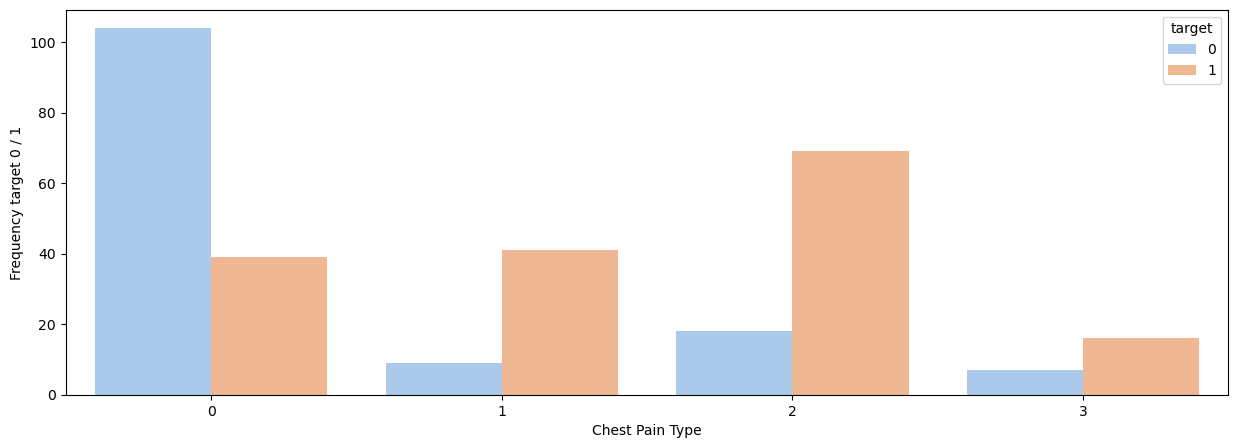

In [16]:
plt.figure(figsize = [15, 5])
sns.countplot(x="cp", hue="target", data=df, palette="pastel")
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency target 0 / 1')
plt.show()

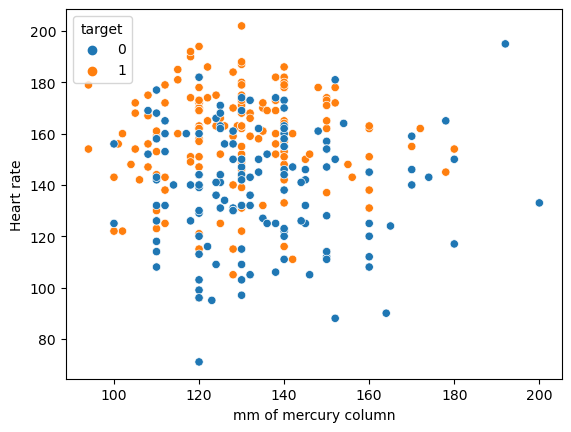

In [17]:
sns.scatterplot(data=df, x="trestbps", y="thalach", hue="target")
plt.xlabel("mm of mercury column")
plt.ylabel("Heart rate")
plt.show()

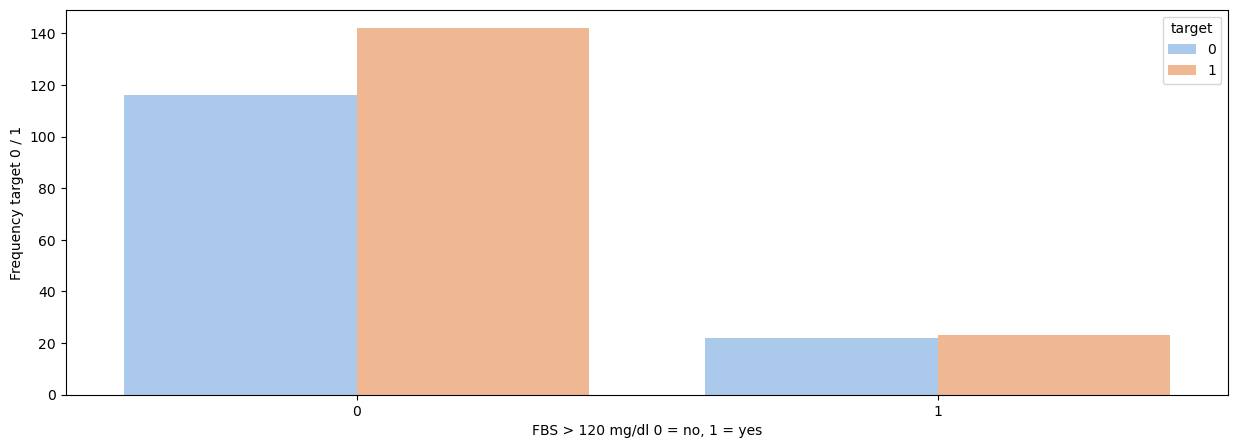

In [18]:
plt.figure(figsize = [15, 5])
sns.countplot(x="fbs", hue="target", data=df, palette="pastel")
plt.xlabel('FBS > 120 mg/dl 0 = no, 1 = yes')
plt.ylabel('Frequency target 0 / 1')
plt.show()

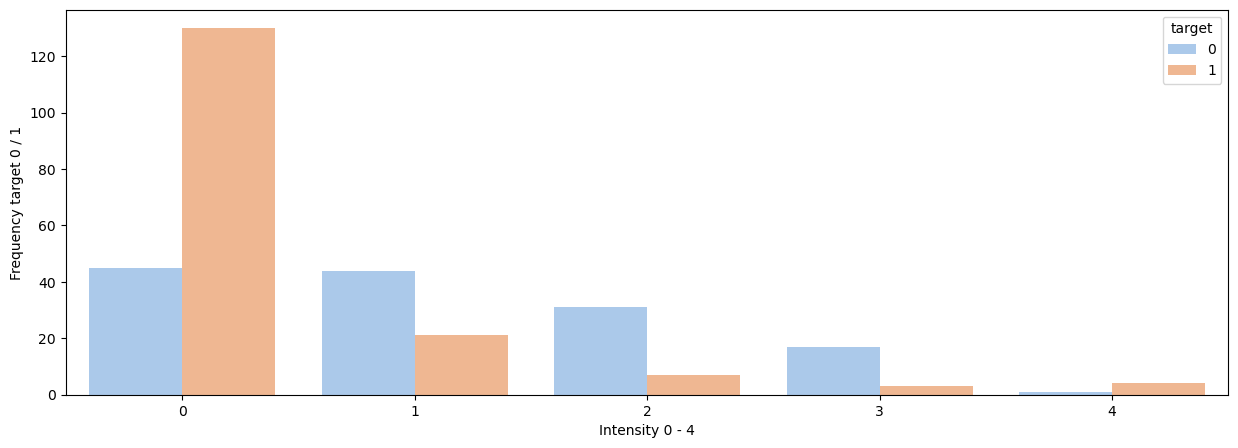

In [19]:
plt.figure(figsize = [15, 5])
sns.countplot(x="ca", hue="target", data=df, palette="pastel")
plt.xlabel('Intensity 0 - 4')
plt.ylabel('Frequency target 0 / 1')
plt.show()

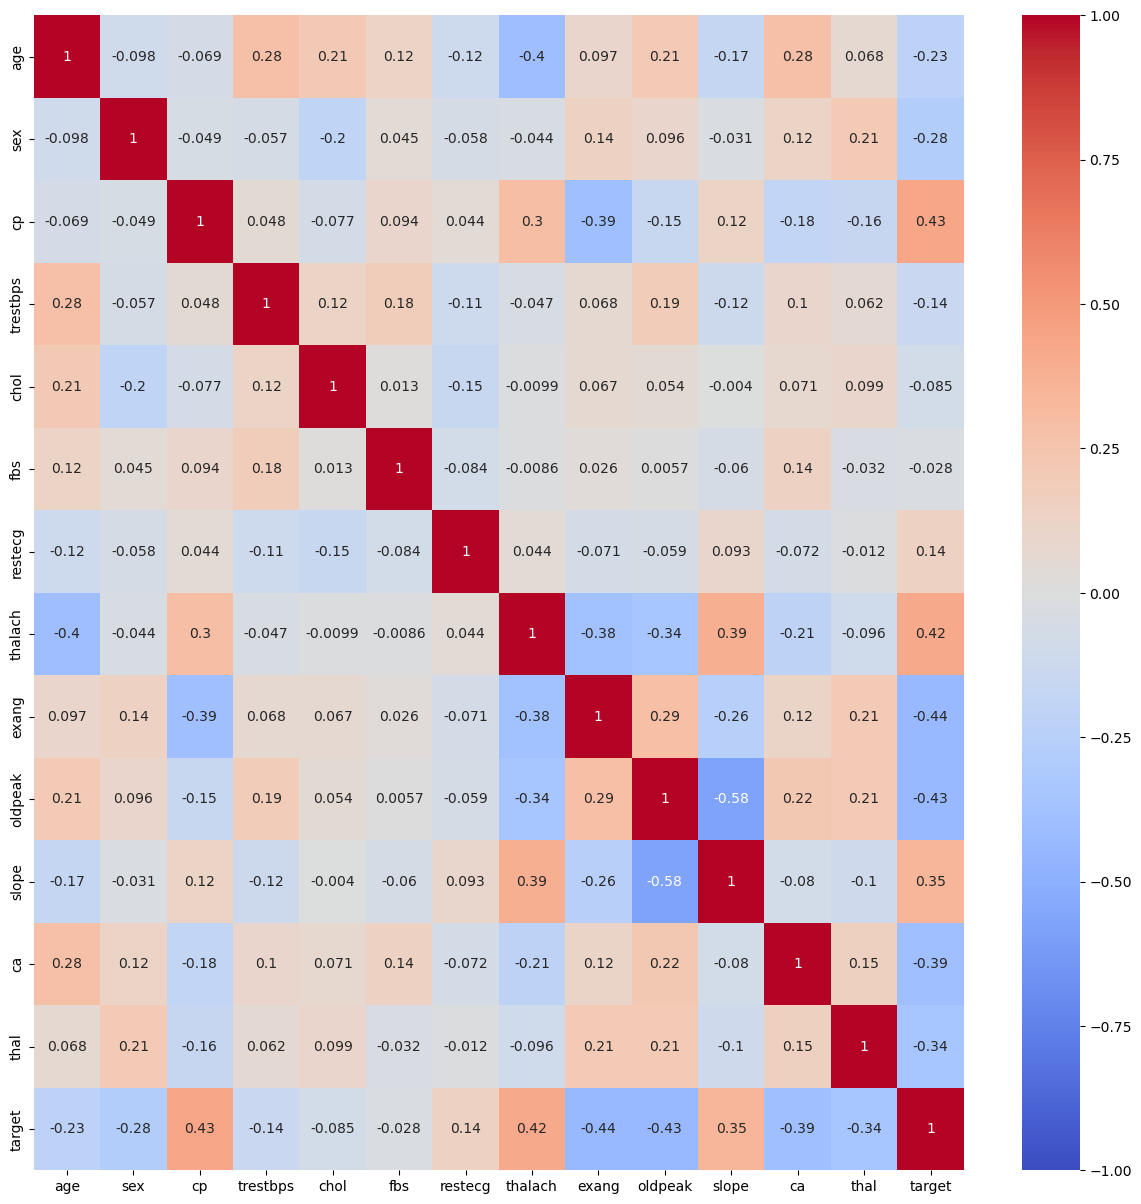

In [20]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.show()

In [21]:
df = pd.get_dummies(df, columns=['cp', 'thal', 'slope'])


In [22]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [23]:
X = df.drop('target', axis=1)
y = df.target 

In [24]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=1)

In [26]:
rf = RandomForestClassifier(criterion ='entropy', max_depth = 5, max_features = 'sqrt', min_samples_split = 6, 
                            n_estimators= 200, bootstrap= True)

In [27]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=6,
                       n_estimators=200)

In [28]:
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(X_test,y_test)*100))

Random Forest Algorithm Accuracy Score : 90.00%


LogisticRegression: ROC AUC=0.933


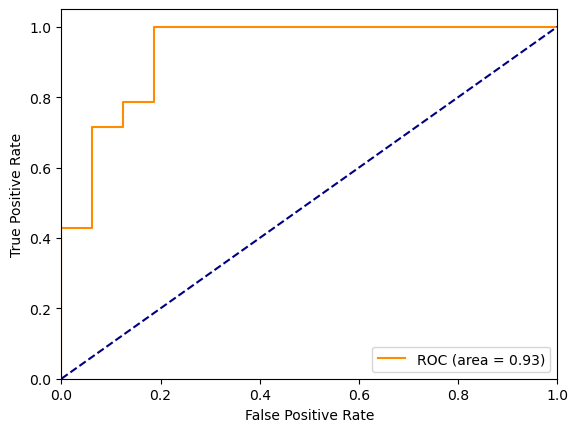

In [29]:
lr_probs = rf.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [30]:
dt_clf = DecisionTreeClassifier(random_state=0)

In [31]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
print("Decision Tree Test Accuracy : {:.2f}%".format(dt_clf.score(X_test,y_test)*100))

Decision Tree Test Accuracy : 86.67%


LogisticRegression: ROC AUC=0.871


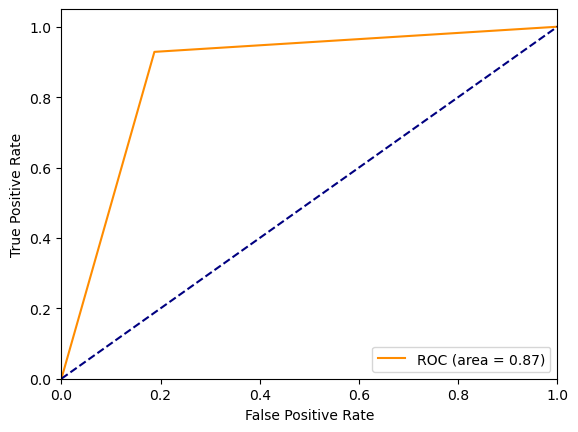

In [33]:
lr_probs = dt_clf.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [34]:
XGB_clf = XGBClassifier(max_depth= 4, min_child_weight= 6, gamma= 0)

In [35]:
XGB_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [36]:
print("XGB Test Accuracy : {:.2f}%".format(XGB_clf.score(X_test,y_test)*100))

XGB Test Accuracy : 93.33%


LogisticRegression: ROC AUC=0.964


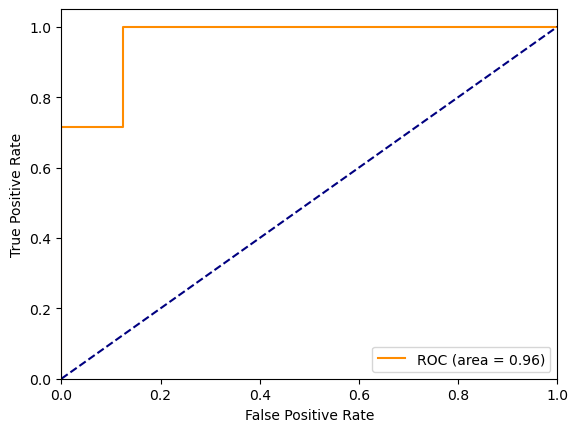

In [37]:
lr_probs = XGB_clf.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [38]:
pred = XGB_clf .predict(X_test)


In [39]:
columns = ['age', 'sex', 'trestbps', 'chol','fbs','restecg','thalach','exang','oldpeak','ca','cp_0','cp_1','cp_2','cp_3',
'thal_0','thal_1','thal_2','thal_3','slope_0','slope_1','slope_2',]
dft = pd.DataFrame(X_test, columns = columns)
dft['pred']=pred

In [40]:
pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1])

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(X)

StandardScaler()

In [43]:
standardized_data = scaler.transform(X)

In [44]:
X = standardized_data
Y = df['target']


In [45]:
classifier = svm.SVC(kernel='linear')

In [46]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [47]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [48]:
print('Accuracy score of the training data  : ', training_data_accuracy)

Accuracy score of the training data  :  0.8571428571428571


In [56]:
df.to_csv(R"C:\Users\Mido Computer\Desktop\heart.csv")

In [50]:
dft.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,pred
0,0.687500,0.0,0.622642,0.086758,0.0,0.0,0.564885,0.0,1.000000,0.75,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,0.562500,1.0,0.339623,0.216895,0.0,0.0,0.702290,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,0.395833,1.0,0.339623,0.296804,1.0,0.0,0.603053,1.0,0.000000,0.50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,0.645833,1.0,0.339623,0.182648,0.0,0.0,0.465649,1.0,0.387097,0.50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,0.437500,1.0,0.528302,0.267123,0.0,0.0,0.435115,0.0,0.419355,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [51]:
import pickle

In [65]:
file = R"C:\Users\Mido Computer\Desktop\heart disease project\model.sav"
pickle.dump(classifier,open(file,'wb'))

In [53]:
loaded_model = pickle.load(open(R'C:\Users\Mido Computer\Desktop\heart disease project\model.sav', 'rb'))


In [62]:
input_data = (63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0
)



In [64]:
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 3.30715788e+02  6.81005225e-01  8.75676527e+02  1.96991861e+03
   2.39443800e+00 -1.00583187e+00  8.55865155e+02 -6.96630546e-01
   1.14051769e+01 -7.14428871e-01  1.05777177e+00 -4.44554224e-01
  -6.34647759e-01 -2.86605752e-01  1.22678441e+01 -2.51312345e-01
   9.08460899e-01 -7.93115539e-01 -2.72888411e-01  1.07902072e+00
  -9.39141937e-01]]
[0]
The person is not diabetic
